<a href="https://colab.research.google.com/github/kritikasharma23/EXCEL-DASHBOARD/blob/main/customer%20services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from matplotlib.ticker import PercentFormatter
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
%matplotlib inline

In [ ]:
#import project file
df_NYC = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6760\1774866890.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NYC = pd.read_csv("C:\\Users\\Admin\\Desktop\\311_Service_Requests_from_2010_to_Present.csv")


In [ ]:
print(type(df_NYC))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_NYC.shape

(300698, 53)

In [ ]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [ ]:
#Identify null values in dataset
df_NYC.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [ ]:
df_NYC.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01-01-16 1:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01-01-16 8:27,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01-01-16 1:17,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [ ]:
df_NYC.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [ ]:
df_NYC_Columns = ['Agency Name','Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'Landmark', 'Facility Type', 'Due Date','Resolution Action Updated Date',
       'Community Board', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name','Location']

In [ ]:
# Drop nullvalue columns,unnecessary data and duplicate data
df_NYC = df_NYC.drop(df_NYC_Columns,axis=1)
df_NYC

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587


In [ ]:
df_NYC = df_NYC[df_NYC['Status']=='Closed']
df_NYC

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587


In [ ]:
df_NYC = df_NYC.drop('Status',axis=1)

In [ ]:
#Identify remaining null values in dataset after dropping columns
df_NYC.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                5903
Location Type               65
Incident Zip               507
City                       506
Resolution Description       0
Borough                      0
Latitude                  1432
Longitude                 1432
dtype: int64

In [ ]:
#Dropped all remaining Null values in dataset
df_NYC.dropna(subset=['Descriptor','Location Type','Incident Zip','City','Latitude','Longitude'],inplace=True)

In [ ]:
#Confirmation of no Null values
df_NYC.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

In [ ]:
df_NYC.shape

(291107, 13)

In [ ]:
# Change data type of columns 'Created date' and 'Closed date' to datetime datatype
df_NYC['Created Date'] = pd.to_datetime(df_NYC['Created Date'])
df_NYC['Closed Date'] = pd.to_datetime(df_NYC['Closed Date'])

In [ ]:
#Created Request Closing Time column and added to dataset
df_NYC['Request Closing Time'] = df_NYC['Closed Date']-df_NYC['Created Date']

In [ ]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291107 non-null  int64          
 1   Created Date            291107 non-null  datetime64[ns] 
 2   Closed Date             291107 non-null  datetime64[ns] 
 3   Agency                  291107 non-null  object         
 4   Complaint Type          291107 non-null  object         
 5   Descriptor              291107 non-null  object         
 6   Location Type           291107 non-null  object         
 7   Incident Zip            291107 non-null  float64        
 8   City                    291107 non-null  object         
 9   Resolution Description  291107 non-null  object         
 10  Borough                 291107 non-null  object         
 11  Latitude                291107 non-null  float64        
 12  Longitude       

In [ ]:
df_NYC.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,Request Closing Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02


In [ ]:
df_NYC['Descriptor'].value_counts().head(10)

Loud Music/Party                 60444
No Access                        56725
Posted Parking Sign Violation    22103
Loud Talking                     21254
Partial Access                   19951
With License Plate               17506
Blocked Hydrant                  15837
Commercial Overnight Parking     11908
Car/Truck Music                  11114
Blocked Sidewalk                 10930
Name: Descriptor, dtype: int64

In [ ]:
df_NYC['Descriptor'].value_counts().sum()

291107

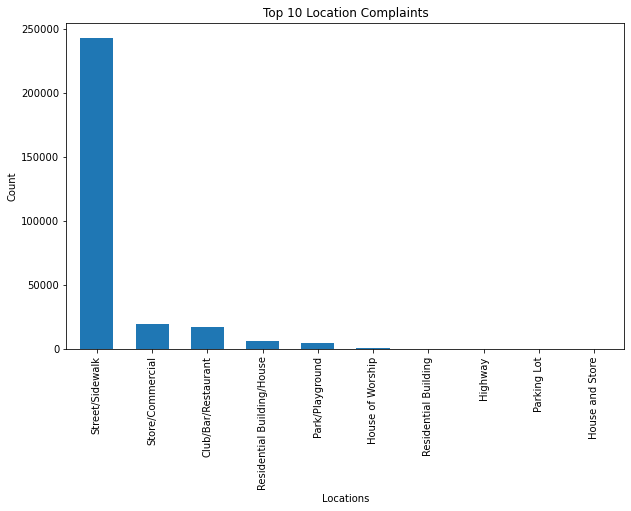

In [ ]:
# Location Type of Street/Sidewalk is the maximum from below bar chart
df_NYC['Location Type'].value_counts().head(10).plot(kind='bar',figsize=(10,6), title = 'Top 10 Location Complaints', xlabel = 'Locations', ylabel = 'Count', width = 0.6)
plt.show()

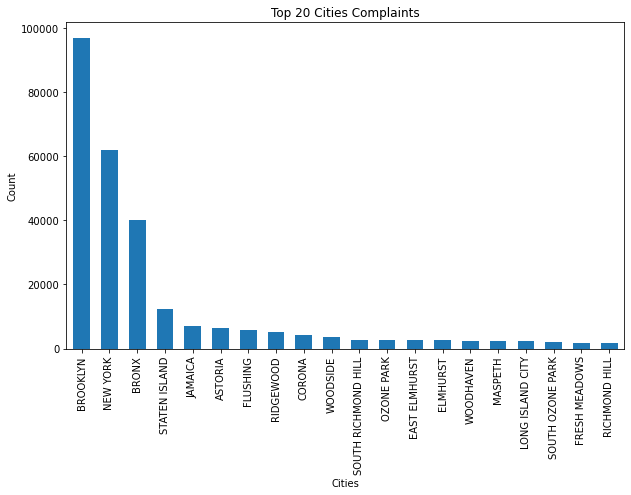

In [ ]:
#BROOKLYN has the most complaints then New York, Bronx, Staten Island considering cities
df_NYC['City'].value_counts().head(20).plot(kind='bar',figsize=(10,6), title = 'Top 20 Cities Complaints', xlabel = 'Cities', ylabel = 'Count', width = 0.6)
plt.show()

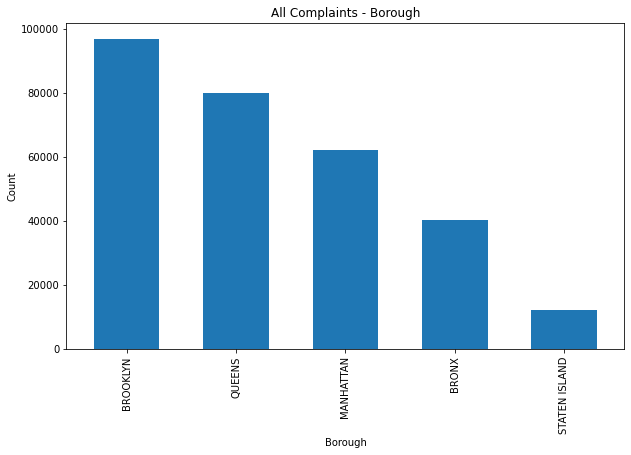

In [ ]:
# BROOKLYN has the most complaints then Queens, Manhattan, Bronx and Staten Island considering Borough
df_NYC['Borough'].value_counts().plot(kind='bar',figsize=(10,6), title = 'All Complaints - Borough', xlabel = 'Borough', ylabel = 'Count', width = 0.6)
plt.show()

In [ ]:
#Borough on the basis of complaints
Top_5_Complaints = df_NYC['Complaint Type'].value_counts()[:5].keys()
Top_5_Complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [ ]:
Borough_Complaints = df_NYC.groupby(['Borough','Complaint Type']).size().unstack()
Borough_Complaints = Borough_Complaints[Top_5_Complaints]
Borough_Complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle
Borough,,,,,
BRONX,12740,7829,8864,2431,1948
BROOKLYN,28119,27386,13315,11451,5164
MANHATTAN,2055,11981,20362,14528,530
QUEENS,31621,21944,4391,6057,8102
STATEN ISLAND,2141,4881,815,677,1762


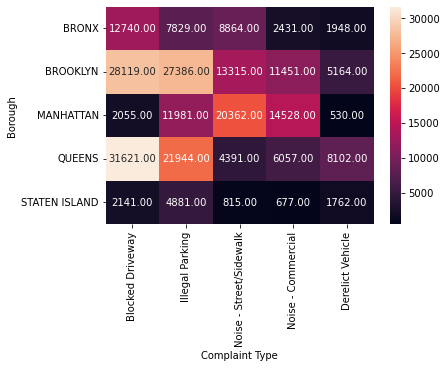

In [ ]:
# use heatmap method to generate the heatmap of the Borough Complaints
sns.heatmap(Borough_Complaints,annot=True,fmt='0.2f')
plt.show()

In [ ]:
# Blocked Driveway is maximum in QUEENS
# Illegal Parking is maximum in BROOKLYN
# Noise - Street/Sidewalk is maximum in MANHATTAN
# Noise - Commercial is maximum in MANHATTAN
# Derelict Vehicle is maximum in QUEENS
# Noise - Vehicle is maximum in QUEENS

In [ ]:
#Complaints on the basis of Borough
Top_Borough = df_NYC['Borough'].value_counts().keys()
Top_Borough

Index(['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'], dtype='object')

In [ ]:
Top_Complaint_Type = df_NYC.groupby(['Complaint Type','Borough']).size().unstack()
Top_Complaint_Type = Top_Complaint_Type[Top_Borough]
Top_Complaint_Type

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,2390,1874,1511,1412,557
Blocked Driveway,28119,31621,2055,12740,2141
Derelict Vehicle,5164,8102,530,1948,1762
Disorderly Youth,72,59,68,63,23
Drinking,257,357,294,187,175
Graffiti,43,37,22,9,2
Illegal Parking,27386,21944,11981,7829,4881
Noise - Commercial,11451,6057,14528,2431,677
Noise - House of Worship,338,297,189,79,17


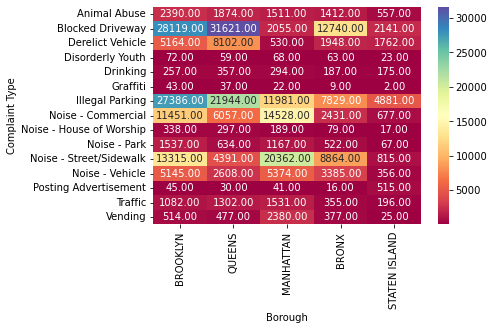

In [ ]:
# use heatmap method to generate the heatmap of the Complaint Types based on Borough
sns.heatmap(Top_Complaint_Type,annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

In [ ]:
# BROOKLYN, QUEENS and BRONX has most complaints of Blocked Driveway.
# MANHATTAN has most complaints of Noise - Street/Sidewalk.
# STATEN ISLAND has most complaints of Illegal Parking.